# Part d
This notebook contains a step-by-step walkthrough of task b) and c) using both code and text.

In [24]:
%load_ext autoreload
%autoreload 2
#Add own modules to path
import sys
sys.path.append('../..')
sys.path.append('../../src/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading the data and constructing the input matrix
In this part the publicly available Wisconsin Breast Cancer data set will be used for classification. The data set can be loaded directly from sklearn's library.
Each sample containts 30 features(e.g mean radius, mean texture etc) and a corresponding class(malignant or benign).

The design matrix is in this case simply the loaded data and is inputted to the network similarily as with regression. The target data is binary(0,1) is now binary as opposed to continuous. Here 0(negative) means malignant, and 1(positive) means benign.

Note that the arguments for scaling still holds, however it doesn't make sense to scale binary data. As such only the design matrix will be scaled.

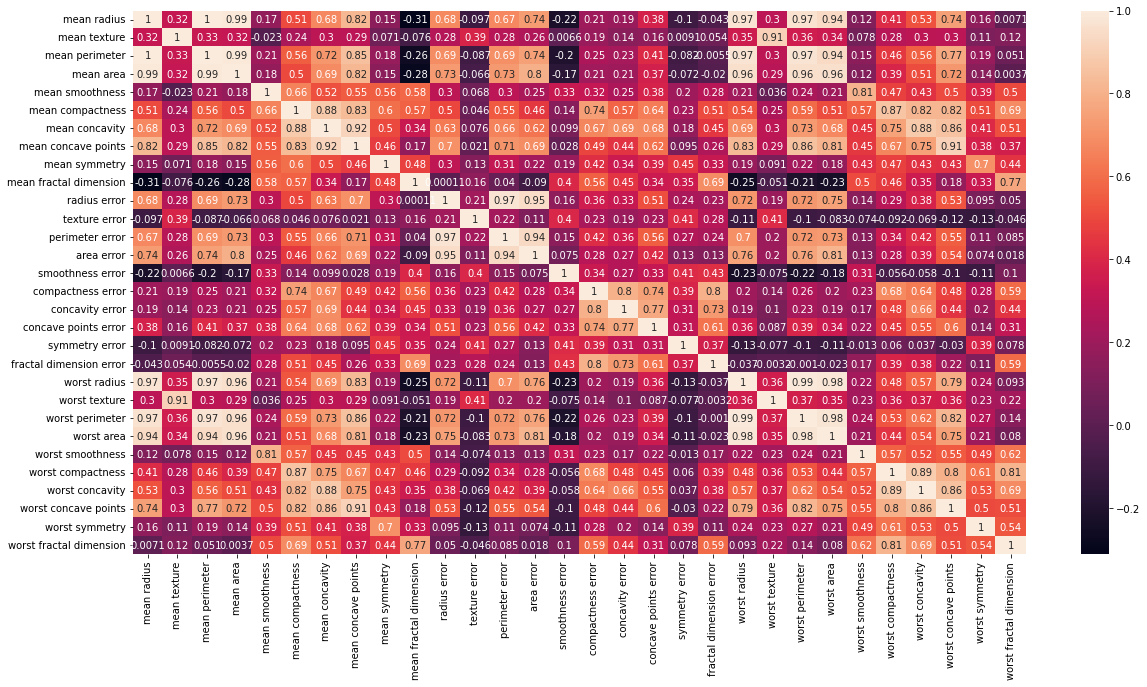

In [25]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
z = data.target
data_df = pd.DataFrame(X, columns=data.feature_names)
corr = data_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data=corr, annot=True)
plt.show()

In [69]:
import numpy as np
z = z.reshape(-1,1)
print("Number of malignant samples:",z[z==0].shape[0], "Fraction:",z[z==0].shape[0]/z.shape[0])
print("Number of benign samples:",z[z==1].shape[0], "Fraction:",z[z==1].shape[0]/z.shape[0])

Number of malignant samples: 212 Fraction: 0.37258347978910367
Number of benign samples: 357 Fraction: 0.6274165202108963


Above print out shows the amount of samples of each of the classe. Note also the fraction of the classes. If one guesses benign on all cases, one would get about 62.7\% correct. Similarliy guessing only malignant would make you about 37.3\% right. In this case, this would also be the accurcies of those guesses.

In [70]:
from src.model_evaluation.metrics import accuracy
guess_benign = np.ones(z.shape)
guess_malignant = np.zeros(z.shape)
print("Accuracy when guessing only benign:", accuracy(z,guess_benign))
print("Accuracy when guessing only malignant:", accuracy(z,guess_malignant))

Accuracy when guessing only benign: 0.6274165202108963
Accuracy when guessing only malignant: 0.37258347978910367


### Confusion matrix
A confusion matrix is a n_classes-by-n_classes grid showing the predictions vs the truths. x-axis shows the predicted labels while y-axis show the truth. A confusion matrix is also sometimes called a truth table and it is useful to study how the predictions went wrong.

Prediction = 1 and truth = 1, is called a true positive(TP)

Prediction = 1 and truth = 0, is called a false positive(FP)

Prediction = 0 and truth = 1, is called a false negative(FN)

Prediction = 0 and truth = 0, is called a true negative(TN)

<AxesSubplot:>

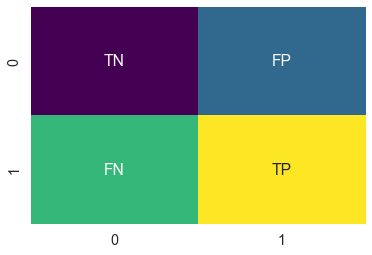

In [103]:
import seaborn as sns

conf = np.array([[0,1],[2,3]])
lab = np.array([['TN','FP'],['FN','TP']])

sns.heatmap(conf,cmap="viridis",annot =lab,fmt='',cbar=False)

It is not always that maximizing accuracy is the only target. It depends on the classification problem. In this case, it is perhaps most dangerous with False positives, meaning prediction says bening, but truth is malignant. This could lead to a malignant cancer going undetected if one trusts the prediction. One might strive to create a model that minimizes FP instead. This would in turn lead to a model with a lot of False negatives, such that the model predicts malignant in many benign cases. This also has it's tolls as it might cause too many cases for the medical professionals to further study, leaving them unable to focus on the actual malignant ones.

One could then argue that maximizing true negatives while minimizing false negatives should be the main target, so that the medical professionals can use the models in addition to the already established practices.

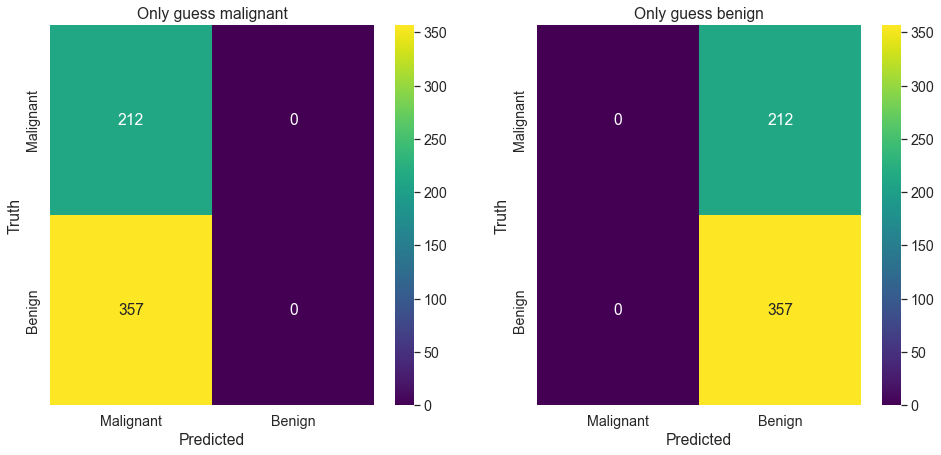

In [91]:
from src.visualization.visualize import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16,7))
ax1 = plot_confusion_matrix(z,guess_malignant,ax=ax1,title = 'Only guess malignant')
ax2 = plot_confusion_matrix(z,guess_benign,ax=ax2, title = 'Only guess benign')

## Neural network classification
By changing the activation function in the output layer to one that maps the values between 0 and 1, one could obtain a probability of a certain class instead. In the case of binary classification sigmoid is used. Now the loss function to minimize is cross entropy instead of squared loss.

In [ ]:
from src.modelling.nn import NeuralNetwork
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,z_train,z_test = train_test_split(X,z,test_size=0.2)
X_scl = StandardScaler().fit(X_train)
X_train = X_scl.transform(X_train)
X_test = X_scl.transform(X_test)

